In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 2)

%matplotlib inline

In [2]:
data = pd.read_csv('HappinessAlcoholConsumption.csv')

In [13]:
data.head().T

,0,1,2,3,4
Country,Denmark,Switzerland,Iceland,Norway,Finland
Region,Western Europe,Western Europe,Western Europe,Western Europe,Western Europe
Hemisphere,north,north,north,north,north
HappinessScore,7.5,7.5,7.5,7.5,7.4
HDI,928,943,933,951,918
GDP_PerCapita,54,80,61,71,43
Beer_PerCapita,224,185,233,169,263
Spirit_PerCapita,81,100,61,71,133
Wine_PerCapita,278,280,78,129,97


## About dataset
 - Country - name of the country
 - Region - the region of the country
 - Hemisphere - hemisphere of country
 - HappinessScore -  a metric measured in 2016 by asking the sampled people
 - HDI - Human Development Index by United Nations Development Programme
 - GDP_PerCapita - Gross Domestic Product index (per capita - per one person)
 - Beer_PerCapita - liters per capita of beer consumption
 - Spirit_PerCapita - consumption of spirits drink ( per capita )
 - Wine_PerCapita - wine consumption

## Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
Country             122 non-null object
Region              122 non-null object
Hemisphere          122 non-null object
HappinessScore      122 non-null float64
HDI                 122 non-null int64
GDP_PerCapita       122 non-null float64
Beer_PerCapita      122 non-null int64
Spirit_PerCapita    122 non-null int64
Wine_PerCapita      122 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 8.7+ KB


In [15]:
# numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HappinessScore,122.0,5.52,1.15,3.07,4.53,5.54,6.48,7.53
HDI,122.0,740.88,149.85,351.00,663.75,757.50,861.50,951.00
GDP_PerCapita,122.0,91.48,209.58,1.03,4.13,12.02,41.99,953.00
Beer_PerCapita,122.0,137.57,104.82,1.00,38.25,125.50,224.75,376.00
Spirit_PerCapita,122.0,96.60,81.44,1.00,25.50,82.50,142.50,373.00
Wine_PerCapita,122.0,66.60,88.12,1.00,5.00,16.00,112.75,370.00


In [6]:
# categorical
data.describe(include=['object'])

,Country,Region,Hemisphere
count,122,122,122
unique,122,9,4
top,Haiti,Sub-Saharan Africa,north
freq,1,28,92


In [43]:
# dividing dataset into categorical and numerical features
categorical = data.select_dtypes(include=['object'])
numerical = data.select_dtypes(exclude=['object'])

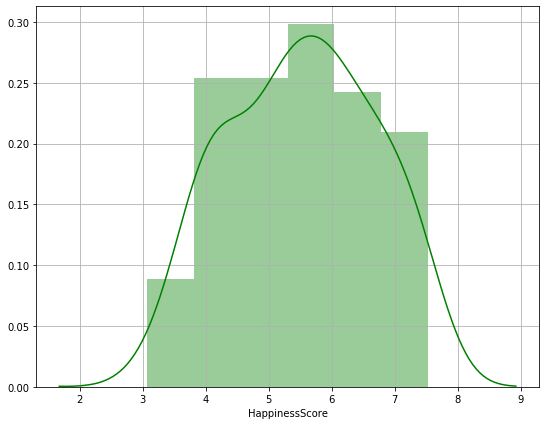

In [102]:
plt.figure(figsize=(9, 7))
plt.grid()
sns.distplot(data['HappinessScore'], color='g')

In [14]:
# what is the average happiness score?
data['HappinessScore'].mean()

5.524827868852458

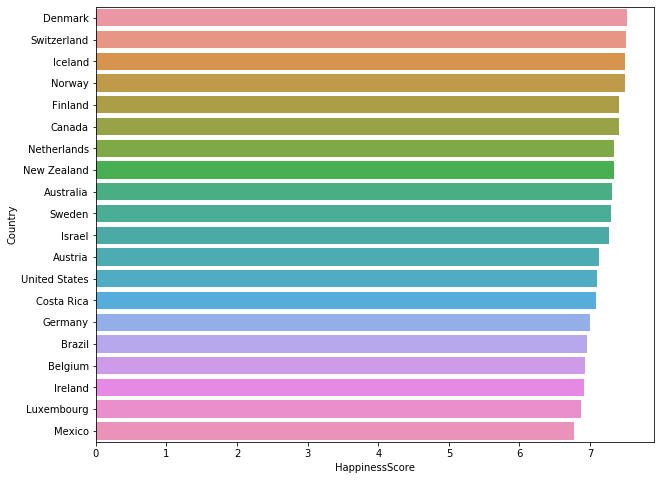

In [72]:
# 20 the most satisfied countries 
most_happy = data.sort_values(by='HappinessScore', ascending=False).head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x='HappinessScore', y='Country', data=most_happy)

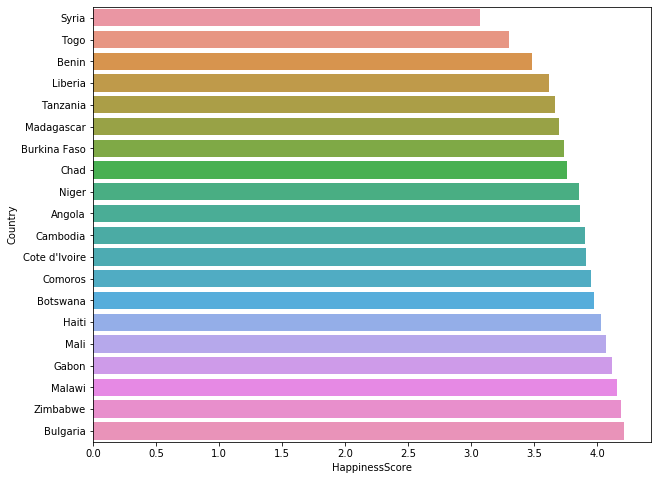

In [74]:
# 20 the least satisfied countries 
least_happy = data.sort_values(by='HappinessScore', ascending=True).head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x='HappinessScore', y='Country', data=least_happy)

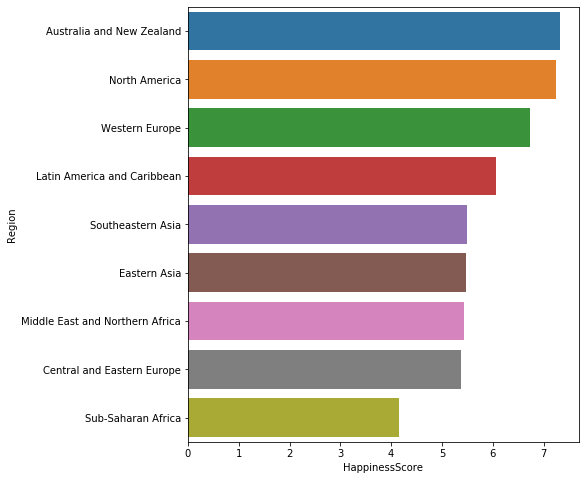

In [36]:
# the mean happiness score throughout different regions sorted in descending order
regions = data.groupby(['Region']).agg(np.mean).reset_index()
plt.figure(figsize=(7, 8))
sns.barplot(x='HappinessScore', y='Region', data=regions.sort_values(by='HappinessScore',
                                                                    ascending=False))

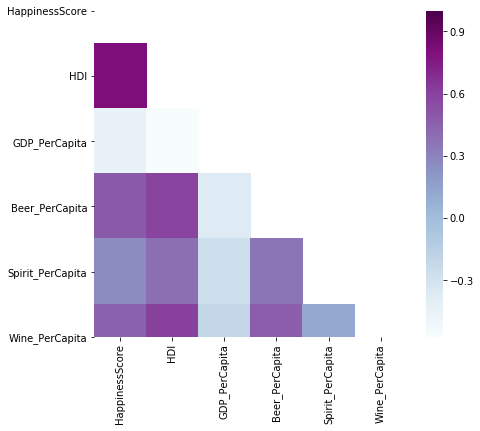

In [62]:
# bivariate relationship
corr = numerical.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(7, 6))
sns.heatmap(corr, mask=mask, cmap='BuPu')

### Obviously HDI (Human Development Index) is pretty important for Happiness Score. Also BeerPerCapita along with WinePerCapita is positive correlated with HDI. Negative correlation is for GDP_PerCapite and HDI.  

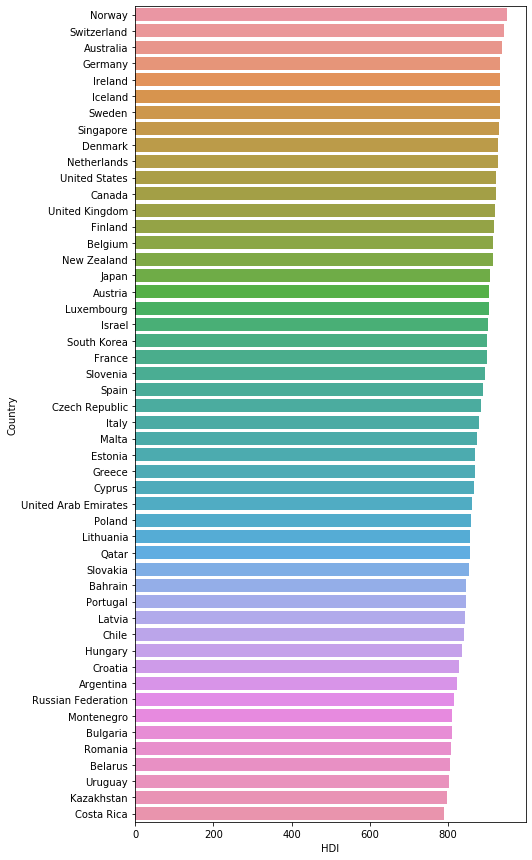

In [71]:
# the largest hdi of first 50 countries (descending order)
cool_hdi = data.sort_values(by='HDI', ascending=False).head(50)
plt.figure(figsize=(7, 15))
sns.barplot(x='HDI', y='Country', data=cool_hdi)

In [70]:
# let's look at Ukraine HDI and HappinessScore
data[data['Country'] == 'Ukraine']

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
96,Ukraine,Central and Eastern Europe,north,4.32,746,2.19,206,237,45


In [75]:
most_happy.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.53,928,53.58,224,81,278
1,Switzerland,Western Europe,north,7.51,943,79.87,185,100,280
2,Iceland,Western Europe,north,7.50,933,60.53,233,61,78
3,Norway,Western Europe,north,7.50,951,70.89,169,71,129
4,Finland,Western Europe,north,7.41,918,43.43,263,133,97


In [76]:
least_happy.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
121,Syria,Middle East and Northern Africa,north,3.07,536,2.06,5,35,16
120,Togo,Sub-Saharan Africa,north,3.30,500,577.00,36,2,19
119,Benin,Sub-Saharan Africa,north,3.48,512,789.00,34,4,13
118,Liberia,Sub-Saharan Africa,north,3.62,432,455.00,19,152,2
117,Tanzania,Sub-Saharan Africa,south,3.67,533,878.00,36,6,1


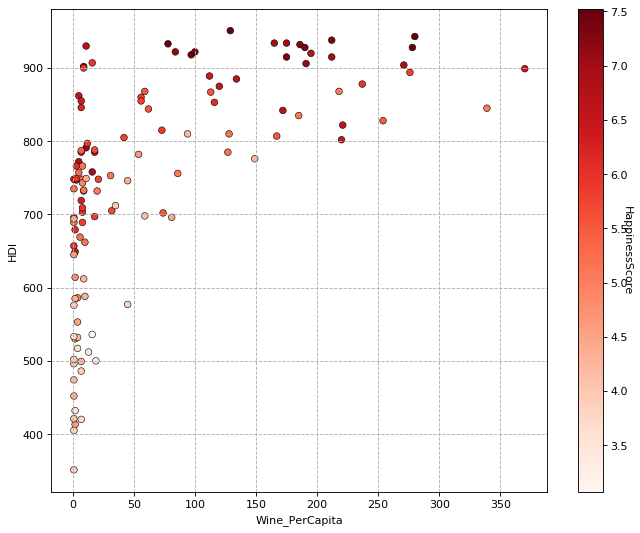

In [94]:
# HDI and WinePerCapita
fig = plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter('Wine_PerCapita', 'HDI', data=data, c='HappinessScore', cmap='Reds', edgecolors='black', linewidth=.5)
plt.xlabel('Wine_PerCapita')
plt.ylabel('HDI')
plt.grid(linestyle='--')
cbar = plt.colorbar()
cbar.set_label("HappinessScore", rotation=270)
plt.show()

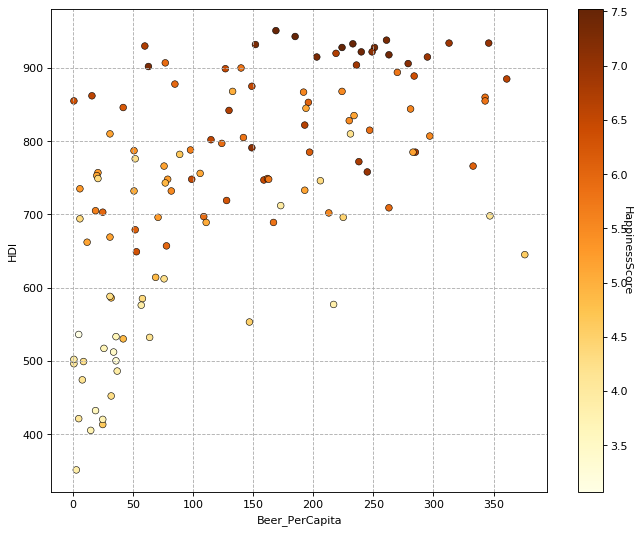

In [98]:
# HDI and BeerPerCapita
fig = plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter('Beer_PerCapita', 'HDI', data=data, c='HappinessScore', cmap='YlOrBr', edgecolors='black', linewidth=.5)
plt.grid(linestyle='--')
plt.xlabel('Beer_PerCapita')
plt.ylabel('HDI')
cbar = plt.colorbar()
cbar.set_label("HappinessScore", rotation=270)
plt.show()

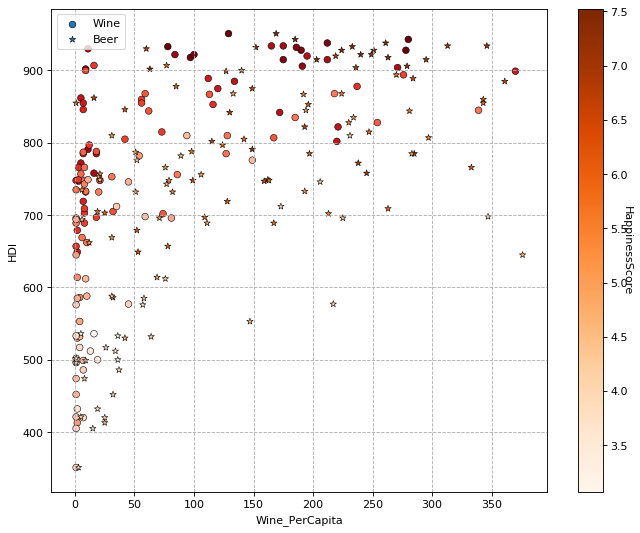

In [100]:
# HDI and WinePerCapita with BeerPerCapita altogether
fig = plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter('Wine_PerCapita', 'HDI', data=data, c='HappinessScore', cmap='Reds', edgecolors='black', linewidth=.5)
plt.scatter('Beer_PerCapita', 'HDI', data=data, c='HappinessScore', marker='*', cmap='Oranges', edgecolors='black', linewidth=.5)
plt.xlabel('Wine_PerCapita')
plt.ylabel('HDI')
plt.grid(linestyle='--')
plt.legend(['Wine', 'Beer'])
cbar = plt.colorbar()
cbar.set_label("HappinessScore", rotation=270)
plt.show()